In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

In [5]:
store = pd.read_csv("/content/drive/MyDrive/TCC/Arquivos/stores.csv")

print(store.head())
print(store.Type.unique())
print(store.Store.unique())
store.describe().round(2)

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
['A' 'B' 'C']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


,Store,Size
count,45.00,45.00
mean,23.00,130287.60
std,13.13,63825.27
min,1.00,34875.00
25%,12.00,70713.00
50%,23.00,126512.00
75%,34.00,202307.00
max,45.00,219622.00


CPI - Consumer Price index (especie de IPCA americano)

Unemployment - Taxa de desemprego

In [6]:
features = pd.read_csv("/content/drive/MyDrive/TCC/Arquivos/features.csv")

features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
features.describe().round(2)

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.00,8190.00,8190.00,4032.00,2921.00,3613.00,3464.00,4050.00,7605.00,7605.00
mean,23.00,59.36,3.41,7032.37,3384.18,1760.10,3292.94,4132.22,172.46,7.83
std,12.99,18.68,0.43,9262.75,8793.58,11276.46,6792.33,13086.69,39.74,1.88
min,1.00,-7.29,2.47,-2781.45,-265.76,-179.26,0.22,-185.17,126.06,3.68
25%,12.00,45.90,3.04,1577.53,68.88,6.60,304.69,1440.83,132.36,6.63
50%,23.00,60.71,3.51,4743.58,364.57,36.26,1176.42,2727.14,182.76,7.81
75%,34.00,73.88,3.74,8923.31,2153.35,163.15,3310.01,4832.56,213.93,8.57
max,45.00,101.95,4.47,103184.98,104519.54,149483.31,67474.85,771448.10,228.98,14.31


In [8]:
train = pd.read_csv("/content/drive/MyDrive/TCC/Arquivos/train.csv")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [10]:
test = pd.read_csv("/content/drive/MyDrive/TCC/Arquivos/test.csv")
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [11]:
test.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [12]:
sample_test = pd.read_csv("/content/drive/MyDrive/TCC/Arquivos/sampleSubmission.csv")
sample_test.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [13]:
sample_test.describe()

,Weekly_Sales
count,115064.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [14]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [15]:
import numpy as np

In [16]:
features['CPI'] = features['CPI'].fillna(np.mean(features['CPI']))
features['Unemployment'] = features['Unemployment'].fillna(np.mean(features['Unemployment']))
features['MarkDown1'] = features['MarkDown1'].fillna(0)
features['MarkDown2'] = features['MarkDown2'].fillna(0)
features['MarkDown3'] = features['MarkDown3'].fillna(0)
features['MarkDown4'] = features['MarkDown4'].fillna(0)
features['MarkDown5'] = features['MarkDown5'].fillna(0)

In [17]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [18]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [19]:
new_data = pd.merge(features, train, on=['Store','Date','IsHoliday'], how='inner')
# merging(adding) all stores info with new training data
final_data = pd.merge(new_data, store, how='inner',on=['Store'])

In [20]:
final_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [21]:
final_data.to_csv('/content/drive/MyDrive/TCC/Arquivos/tabela_completa.csv')

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
sns.set_style('darkgrid')

In [24]:
final_data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Type', 'Size'],
      dtype='object')

In [25]:
corr = final_data[['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Type', 'Size']].corr()

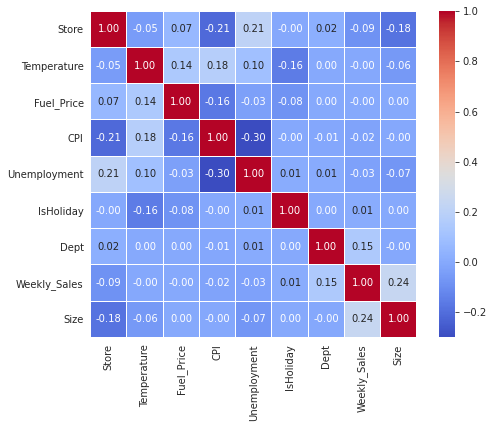

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', square='true', linewidths=0.1, vmax=1, linecolor='white', annot=True)

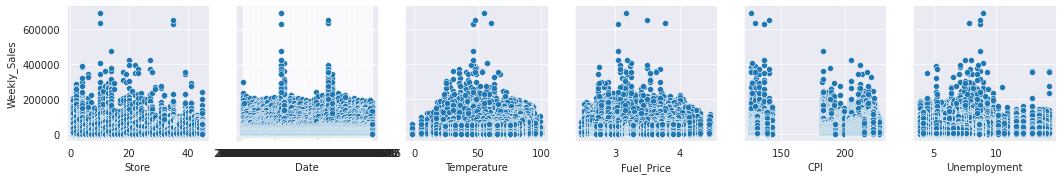

In [27]:
sns.pairplot(final_data, x_vars=['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], y_vars='Weekly_Sales')

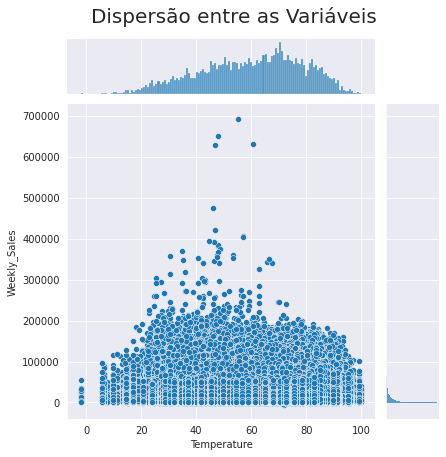

In [28]:
ax = sns.jointplot(x='Temperature', y='Weekly_Sales', data=final_data)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

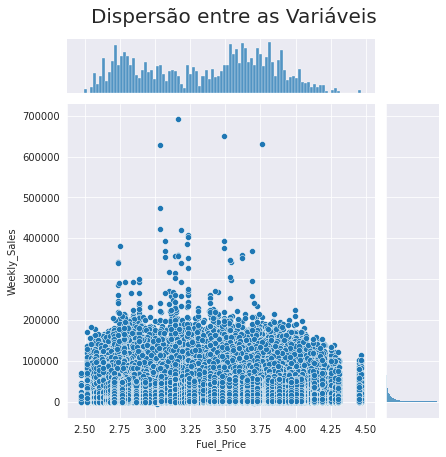

In [29]:
ax = sns.jointplot(x='Fuel_Price', y='Weekly_Sales', data=final_data)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

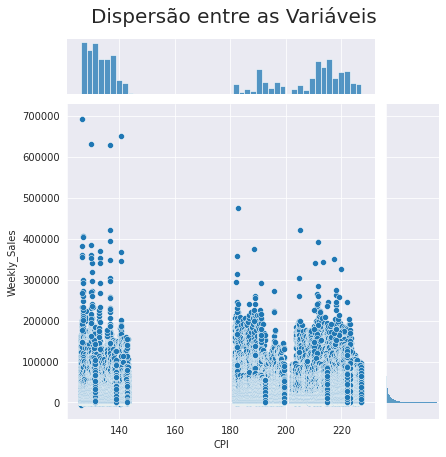

In [30]:
ax = sns.jointplot(x='CPI', y='Weekly_Sales', data=final_data)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

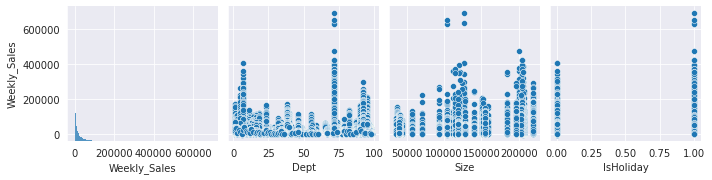

In [31]:
sns.pairplot(final_data[['Weekly_Sales', 'Dept', 'Type', 'Size', 'IsHoliday']], y_vars='Weekly_Sales')

In [32]:
import numpy as np

['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],

final_data['log_Weekly_Sales'] = np.log(final_data['Weekly_Sales'])
final_data['log_Store'] = np.log(final_data['Store'])
final_data['log_Temperature'] = np.log(final_data['Temperature'])
final_data['log_Fuel_Price'] = np.log(final_data['Fuel_Price'])
final_data['log_CPI'] = np.log(final_data['CPI'])
final_data['log_Unemployment'] = np.log(final_data['Unemployment'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
filter = final_data.query("Weekly_Sales<=0")
final_data = final_data.drop(filter.index, axis=0)
filter_2 = final_data.query("log_Weekly_Sales<=0")
final_data = final_data.drop(filter_2.index, axis=0)

In [34]:
final_data.query("log_Weekly_Sales<=0")

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,log_Weekly_Sales,log_Store,log_Temperature,log_Fuel_Price,log_CPI,log_Unemployment


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


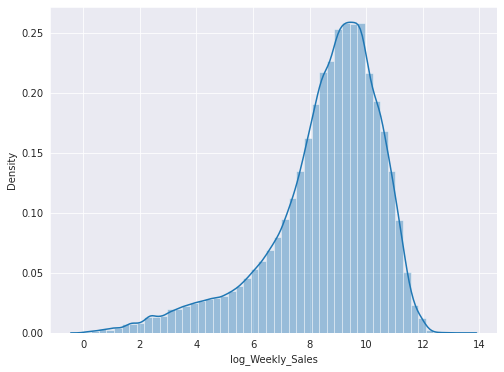

In [35]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.distplot(final_data['log_Weekly_Sales'])

In [36]:
final_data['Weekly_Sales'].describe()

count    419395.000000
mean      16064.346832
std       22740.591920
min           1.010000
25%        2144.190000
50%        7695.960000
75%       20307.955000
max      693099.360000
Name: Weekly_Sales, dtype: float64

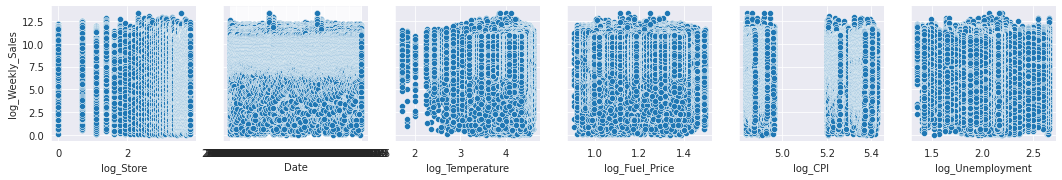

In [37]:
sns.pairplot(final_data, x_vars=['log_Store', 'Date', 'log_Temperature', 'log_Fuel_Price', 'log_CPI', 'log_Unemployment'], y_vars='log_Weekly_Sales')

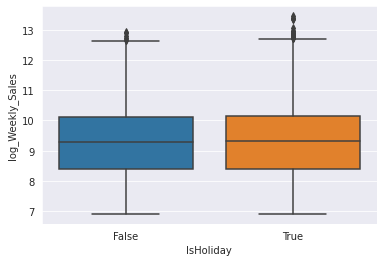

In [38]:
ax = sns.boxplot(x='IsHoliday', y='log_Weekly_Sales', data=final_data.query("Weekly_Sales>1000"))

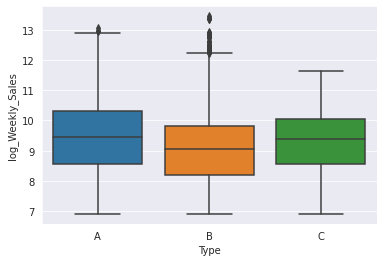

In [62]:
ax = sns.boxplot(x='Type', y='log_Weekly_Sales', data=final_data.query("Weekly_Sales>1000"))

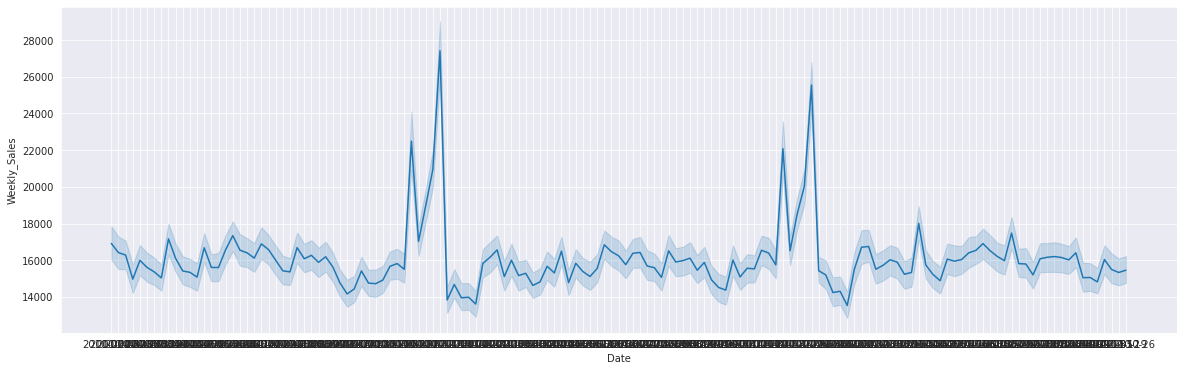

In [40]:
fig, ax = plt.subplots(1,1,figsize=(20,6))
sns.lineplot(x='Date', y='Weekly_Sales', data=final_data)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
final_data.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
log_Weekly_Sales     0
log_Store            0
log_Temperature     67
log_Fuel_Price       0
log_CPI              0
log_Unemployment     0
dtype: int64

In [43]:
final_data['log_Temperature'] = final_data.fillna(np.mean(final_data['log_Temperature']))

In [44]:
final_data['log_Temperature'] = final_data['log_Temperature'].astype(float)
final_data.dtypes

Store                 int64
Date                 object
Temperature         float64
Fuel_Price          float64
MarkDown1           float64
MarkDown2           float64
MarkDown3           float64
MarkDown4           float64
MarkDown5           float64
CPI                 float64
Unemployment        float64
IsHoliday              bool
Dept                  int64
Weekly_Sales        float64
Type                 object
Size                  int64
log_Weekly_Sales    float64
log_Store           float64
log_Temperature     float64
log_Fuel_Price      float64
log_CPI             float64
log_Unemployment    float64
dtype: object

In [80]:
filter_data = final_data.query("Weekly_Sales>100000")

In [81]:
y = filter_data['log_Weekly_Sales']
X = filter_data[['log_CPI', 'log_Store', 'log_Temperature', 'log_Fuel_Price', 'log_Unemployment']]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(127137, 5) (54488, 5)
(127137,) (54488,)


In [84]:
X_train.dtypes

log_CPI             float64
log_Store           float64
log_Temperature     float64
log_Fuel_Price      float64
log_Unemployment    float64
dtype: object

In [85]:
import statsmodels.api as sm

In [86]:
X_train_const = sm.add_constant(X_train)

In [87]:
X_train_const.head()

,const,log_CPI,log_Store,log_Temperature,log_Fuel_Price,log_Unemployment
274997,1.0,4.875484,3.332205,28.0,1.416096,2.453330
345869,1.0,5.396419,3.583519,36.0,1.194225,1.890548
138689,1.0,4.882059,2.708050,15.0,1.084175,2.102303
173624,1.0,4.916045,2.890372,18.0,1.272566,2.136649
219824,1.0,4.888518,3.135494,23.0,1.120048,1.665251


In [124]:
y = final_data['log_Weekly_Sales']
X = final_data[['log_Temperature', 'log_Store', 'log_Unemployment']] #'log_CPI', 'log_Store', 'log_Temperature', 'log_Fuel_Price', 'log_Unemployment']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_const = sm.add_constant(X_train)

In [125]:
modelo_statsmodels = sm.OLS(y_train, X_train_const, hasconst = True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:       log_Weekly_Sales   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2166.
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:08:42   Log-Likelihood:            -6.1692e+05
No. Observations:              293576   AIC:                         1.234e+06
Df Residuals:                  293572   BIC:                         1.234e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.9911      0.036  

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [77]:
modelo = LinearRegression()

In [78]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
print("R² = %.3f" % modelo.score(X_train, y_train))

R² = 0.004
